# SDR Transmission

How can we do transmission. Since we don't know what kind of modulation, this thing will have to be capable of any. We'll have a look at quadrature upconversion (the equivalent of a direct conversion transmitter)

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy

## Arbitrary Modulation

We want the output signal, $s(t)$ to be $s(t) = A(t) \cos(\omega_c t + \phi(t))$. Here $\omega_c$ is the carrier frequency, and $A(t)$ is a changing amplitude, and $\phi(t)$ is a changing phase. These can be any function, which will allow AM as well as FM, or QPSK or more

Using a trig identity 
$$ s(t) = A(t) \cos(\omega_c t + \phi(t)) = A(t)\cos(\phi(t))\cos(\omega_c t) - A(t)\sin(\phi(t))\sin(\omega_c t)$$
So the RF signal is the sum of two parts. 

Our local oscillator is set to the carrier frequency, and the $I_{LO}(t) = \cos(\omega_c t)$, and $Q_{LO}(t) = \sin(\omega_c t)$, so we can say
$$s(t) = A(t)\cos(\phi(t)) I_{LO}(t) - A(t)\sin(\phi(t)) Q_{LO}(t)$$

## The TX Mixer's Job

So the mixer has the job of constructing $s(t)$. Our modulator (the CPU) creates two components from $A(t)$ and $\phi(t)$,
$$ I_{bb} = A(t)\cos(\phi(t)) $$
$$ Q_{bb} = -A(t)\sin(\phi(t)) $$
The output is then:
$$s(t) = I_{bb} I_{LO}(t) + Q_{bb}(t) Q_{LO}(t)$$

Once again, we'll use a switching mixer and use the example of FM

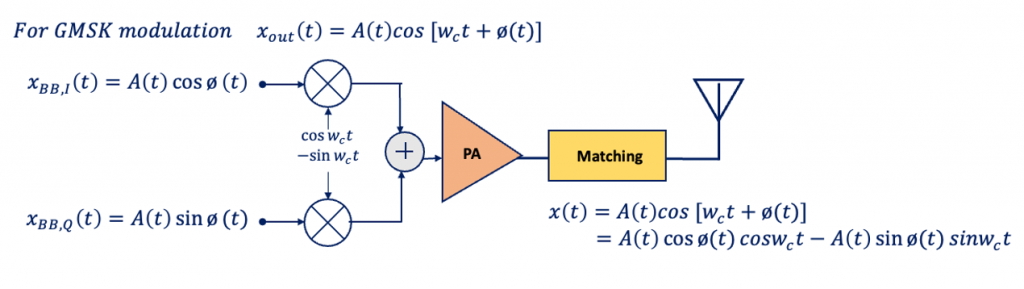

## Example: FM Modulation



In [2]:
f_voice = 1e3
omega_voice = 2*np.pi*f_voice
f_carrier = 50e6
omega_carrier = 2*np.pi*f_carrier
fs = 10*f_carrier
t = np.arange(0, 3/f_voice, step=1/(fs));

In [3]:
phi_t = omega_voice*t
a = 1
x_bb_i = a*np.cos(phi_t)
x_bb_q = a*np.sin(phi_t)

In [4]:
lo_i = np.cos(omega_carrier*t)
lo_q = np.sin(omega_carrier*t)

Now we have the voice signal, the local oscillator. Next we must mix the two together. This is done by switching the voice using the LO as a square wave

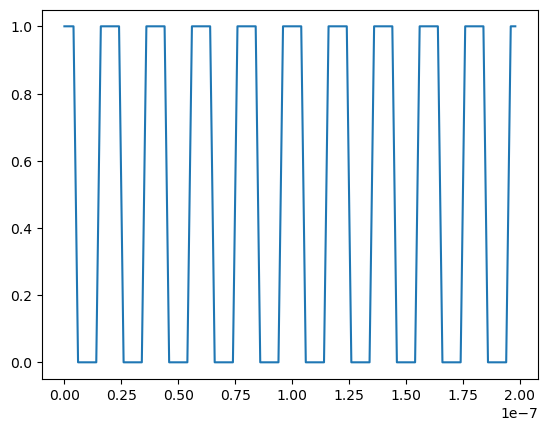

In [5]:
lo_switch_i = lo_i > 0
lo_switch_q = lo_q > 0

mix_i = lo_switch_i * x_bb_i

n = 100
plt.plot(t[0:n], mix_i[0:n]);

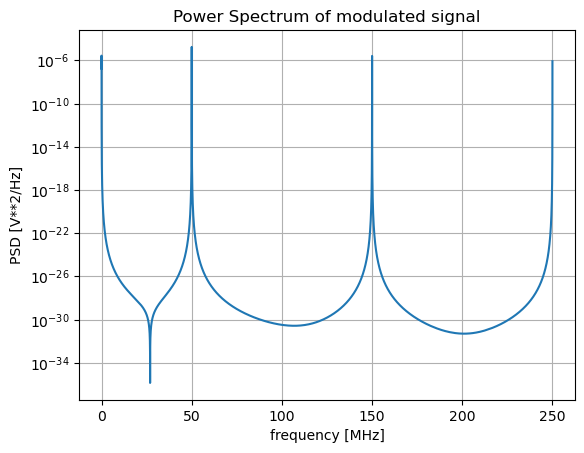

In [6]:
f, Pxx_den = scipy.signal.welch(mix_i, fs, nperseg=len(mix_i)/10)

plt.semilogy(f/1e6, Pxx_den);
plt.xlabel('frequency [MHz]');
plt.ylabel('PSD [V**2/Hz]');
plt.title('Power Spectrum of modulated signal')
plt.grid()

So we can see the modulated signal has a peak at the carrier frequency (and lots of harmonics)

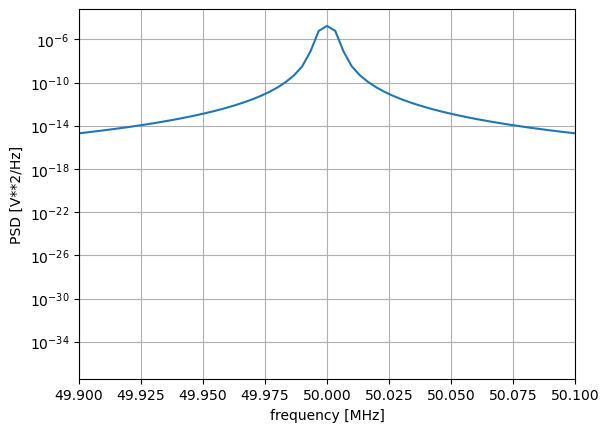

In [8]:
plt.semilogy(f/1e6, Pxx_den);
plt.xlabel('frequency [MHz]');
plt.ylabel('PSD [V**2/Hz]');
plt.xlim([49.9, 50.1])
plt.grid()